In [11]:
import numpy as np
import pandas as pd
import cv2
from math import sqrt
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter1d
#from scipy import signal
#from scipy.ndimage.filters import convolve
import os
array_of_origin_img = []
array_of_img = [] # Store all the image data
gauss_pyr = {} #2d array to store gaussian pyramid
DOG_pyr = {}
# Read directory function
def read_directory(directory_name):
    filenumber = len([name for name in os.listdir(directory_name) if os.path.isfile(os.path.join(directory_name, name))])
    for i in range(1,filenumber+1):
        img = cv2.imread(directory_name + "/" + str(i)+".jpg")
        array_of_img.append(img)
        array_of_origin_img.append(img)

def clear_all():
    gauss_pyr.clear()
    DOG_pyr.clear()
    
        
def gaussian_blur(img, sigma):
    size = 2*round(3.5*sigma)+1
    return cv2.GaussianBlur(img,(size,size),sigma)       

def pre_process_img(image):
    signal = image
    signal = cv2.cvtColor(signal, cv2.COLOR_BGR2GRAY)
    signal = cv2.normalize(signal, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    signal = gaussian_blur(signal,0.5)
    signal = cv2.resize(signal,None,fx=2,fy=2)
    
    return signal


def generate_octave(image):
    octaves = 4
    intervals = 2
    
    s = 2
    k = 2 ** (1.0 / s)
    init_sigma = 1.6
    
    gauss_pyr[1] = {}
    gauss_pyr[1][1] = np.array(image)
    
    for octave in range(1,octaves+1):
        sigma = init_sigma
        
        DOG_pyr[octave] = np.zeros((intervals+2,np.size(gauss_pyr[octave][1],0),np.size(gauss_pyr[octave][1],1)))
        for interval in range(2,intervals+3):
            print(octave,interval)
            sigma_f = sqrt(2**(1/intervals) -1)*sigma
            sigma = (2**(1/intervals))*sigma
            gauss_pyr[octave][interval] = gaussian_blur(gauss_pyr[octave][interval-1],sigma_f)
            DOG_pyr[octave][interval-1] = gauss_pyr[octave][interval] - gauss_pyr[octave][interval-1]
            print(DOG_pyr[octave][interval-1].shape)
            print(gauss_pyr[octave][interval].shape)
            print("===================")
        if octave < octaves+1:
            gauss_pyr[octave+1] = {}
            gauss_pyr[octave+1][1] = cv2.resize(gauss_pyr[octave][intervals+1],None,fx=0.5,fy=0.5,interpolation=cv2.INTER_NEAREST)
    imageout = DOG_pyr[octaves][3]
    plt.figure()
    plt.imshow(imageout)
    cv2.imwrite(dirname+'.jpg', imageout)
def SIFT(inputname):
    
    read_directory(inputname)
    
    
    for i in range(len(array_of_img)):
        image = array_of_img[i]
        image = pre_process_img(image)
        generate_octave(image)
        clear_all()
        print("===================")
        break
    
    
    
    print(len(array_of_img))
#     for i in range(len(array_of_img)):
#         imageout = cv2.resize(array_of_img[i],None,fx=0.5,fy=0.5)
    #use: len(array_of_img) for looping the image, array_of_img[0],
    #array_of_img[1],array_of_img[2],...for processing each image
    #Start SIFT here
    
    #print(array_of_img)
    #End of SIFT here and use imageoutput for your output
    imageoutput = array_of_img[0]
    array_of_img.clear()
    array_of_origin_img.clear()
    return imageoutput

NCTU
1 2
(8064, 6048)
(8064, 6048)
1 3
(8064, 6048)
(8064, 6048)
1 4
(8064, 6048)
(8064, 6048)
2 2
(4032, 3024)
(4032, 3024)
2 3
(4032, 3024)
(4032, 3024)
2 4
(4032, 3024)
(4032, 3024)
3 2
(2016, 1512)
(2016, 1512)
3 3
(2016, 1512)
(2016, 1512)
3 4
(2016, 1512)
(2016, 1512)
4 2
(1008, 756)
(1008, 756)
4 3
(1008, 756)
(1008, 756)
4 4
(1008, 756)
(1008, 756)
11
parrington
1 2
(1024, 768)
(1024, 768)
1 3
(1024, 768)
(1024, 768)
1 4
(1024, 768)
(1024, 768)
2 2
(512, 384)
(512, 384)
2 3
(512, 384)
(512, 384)
2 4
(512, 384)
(512, 384)
3 2
(256, 192)
(256, 192)
3 3
(256, 192)
(256, 192)
3 4
(256, 192)
(256, 192)
4 2
(128, 96)
(128, 96)
4 3
(128, 96)
(128, 96)
4 4
(128, 96)
(128, 96)
17


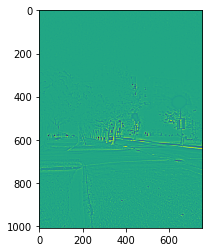

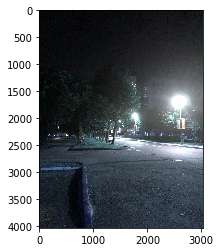

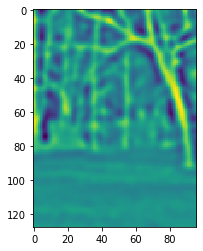

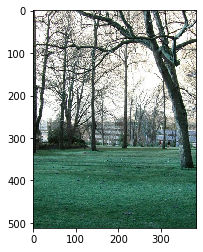

In [12]:
f = open('testfile.txt', 'r')
dirname = str(f.readline()).strip()
while(dirname):   
    print(dirname)
    imageout=SIFT(dirname)
    plt.figure()
    plt.imshow(imageout)
    cv2.imwrite(dirname+'.jpg', imageout)
    dirname = str(f.readline()).strip()